<a href="https://colab.research.google.com/github/abhee74/sms-spam-detection/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# importing necessary libraries

# for numerical operations
import pandas as pd
import numpy as np

# for graphical visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sms_df=pd.read_csv('/content/spam.csv' , encoding = "ISO-8859-1")

In [11]:
# note :- Column names in sms_df doesn't have any meaning
# thus, we will handle it in upcoming steps
sms_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [12]:
# (rows,columns)
sms_df.shape

(5572, 5)

In [13]:
# rows*columns
sms_df.size

27860

In [14]:
# first 5 records
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
# last five records
sms_df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [16]:
# random 5 records
sms_df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3461,spam,Bloomberg -Message center +447797706009 Why wa...,NaN,NaN,NaN
3334,ham,"Sorry, got a late start, we're on the way",NaN,NaN,NaN
4223,ham,Double eviction this week - Spiral and Michael...,NaN,NaN,NaN
171,ham,"Hmmm.. Thk sure got time to hop ard... Ya, can...",NaN,NaN,NaN
5474,ham,Where's mummy's boy ? Is he being good or bad ...,NaN,NaN,NaN


In [17]:
'''
Note :-
all the columns are of object type,
thus we need to convert them into numeric type
because model only takes numeric values for prediction

'''
sms_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [18]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
'''
no numeric data,
thus there is no benefit of applying describe()
'''
# sms_df.describe()

'\nno numeric data,\nthus there is no benefit of applying describe()\n'

In [20]:
sms_df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [21]:
'''
axis=1 mean's dropping operation on columns
axis=0 mean's dropping operations on rows/records ( instead of names, it uses index id)

'''
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [22]:
# after dropping

sms_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
sms_df.rename(columns={'v1':'target','v2':'sms'},inplace=True)

In [24]:
sms_df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# note :- duplicated() function returns boolean values
#  False - >  duplicated record not found
#  True  - > duplicated record found

sms_df[sms_df.duplicated()]

,target,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [26]:
# total number of duplicated records in our dataframe
sms_df.duplicated().sum()

403

In [27]:
# before removing duplicate records
sms_df.shape

(5572, 2)

In [28]:
sms_df.drop_duplicates(inplace=True)

In [29]:
# after removing duplicate records
sms_df.shape

(5169, 2)

In [31]:
sms_df.columns

Index(['target', 'sms'], dtype='object')

In [32]:
# 'target' column contain higher 'ham' sms,
# thus, data seems unbalance


# Total number of 'ham' and 'spam' messages in 'target' column
sms_df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

In [33]:
# in percentage
sms_df['target'].value_counts(normalize=True)*100

ham     87.366996
spam    12.633004
Name: target, dtype: float64

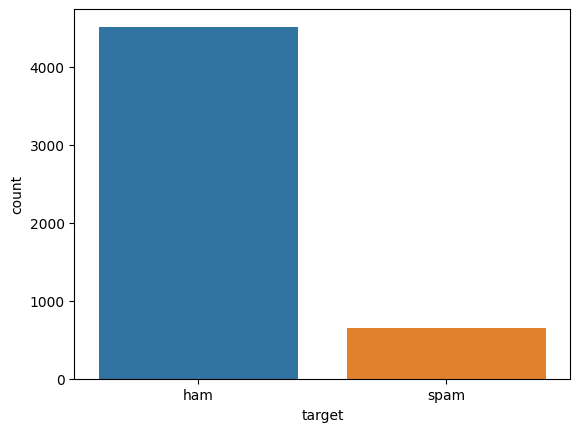

In [34]:
# data is unbalanced

sns.countplot(x=sms_df['target'])
plt.show()

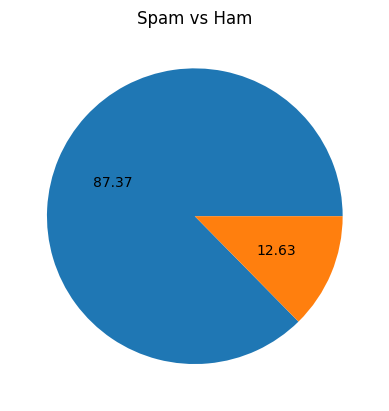

In [35]:
# Calculating individal % of each category of 'Species' column

plt.pie(x=sms_df['target'].value_counts(),autopct='%.2f')
plt.title('Spam vs Ham')
plt.show()

In [36]:
from wordcloud import WordCloud

In [37]:
plt.figure(figsize=(30,30))
wc=WordCloud(width=2000,height=1000,background_color='black')

<Figure size 3000x3000 with 0 Axes>

###### For spam sms

In [38]:
# Note :- .str -> used to convert 'series' object into 'string'
# .cat() -> used to seprate each records by " " (space)

spam_wc=wc.generate(sms_df[sms_df['target']=='spam']['sms'].str.cat(sep=" "))
spam_wc

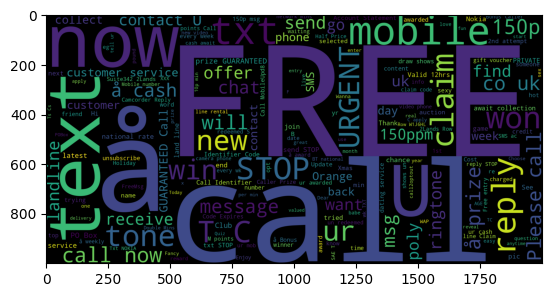

In [39]:
plt.imshow(spam_wc)
plt.show()

In [40]:
ham_wc=wc.generate(sms_df[sms_df['target']=='ham']['sms'].str.cat(sep=" "))
ham_wc

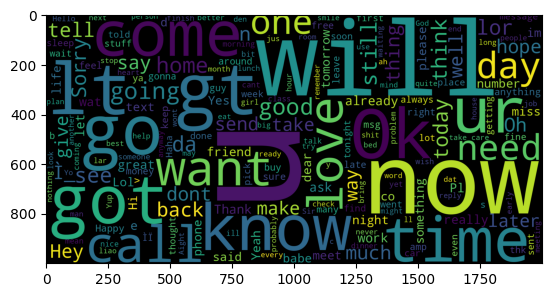

In [41]:
plt.imshow(ham_wc)
plt.show()

In [42]:
# converting 'spam' as 1 and 'ham' as 0 numeric value
sms_df['target']=sms_df['target'].map({'spam':1,'ham':0})

In [43]:
# after changes
sms_df['target'].unique()

array([0, 1])

In [44]:
sms_df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
# nltk -> natural language tool kit
# PUNKT is an unsupervised trainable model tokenizer
# It tokenizer divides a text into a list of sentences by using an unsupervised algorithm
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [46]:
import string

from nltk.corpus import stopwords
nltk.download('stopwords')


from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
print(string.punctuation,"\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 




In [48]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
def transform_sms(message):

    # to convert all characters in lower case
    message=message.lower()

    # to break sms record into words
    message=nltk.word_tokenize(message)

    # to remove special symbals
    temp=[]
    for i in message:
        if i.isalnum():
            temp.append(i)

    # creating clone of temp
    message=temp[:]

    # clear the temp object
    temp.clear()

    # removing stopwords and punctuations
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)

    message=temp[:]
    temp.clear()

    # stemming
    for i in message:
        temp.append(ps.stem(i))


    return " ".join(temp)

In [50]:
# calling function 'transform_sms' by passing 'sms' records

sms_df['sms']=sms_df['sms'].apply(transform_sms)

In [51]:
# after transformation
sms_df.head()

,target,sms
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [52]:
# note :- now 'spam' is equal to 1

spam_wc=wc.generate(sms_df[sms_df['target']==1]['sms'].str.cat(sep=" "))
spam_wc

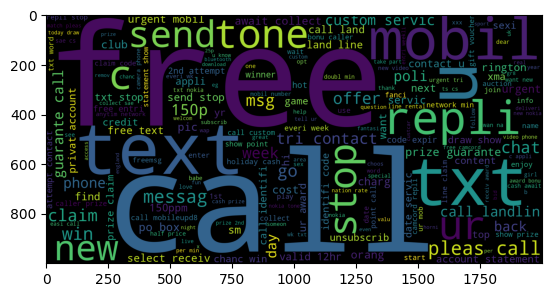

In [53]:
plt.imshow(spam_wc)
plt.show()

In [54]:
# for storing most used words
most_used_spam_words=[]

# .tolist() -> to convert 'series' object into 'list'
spam_list=sms_df[sms_df['target']==1]['sms'].tolist()

# accessing each individual elements from spam_list
for sentense in spam_list:

    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_spam_words.append(word)


In [55]:
# used for finding most comman words
from collections import Counter

In [56]:
top_10=pd.DataFrame(Counter(most_used_spam_words).most_common(10))

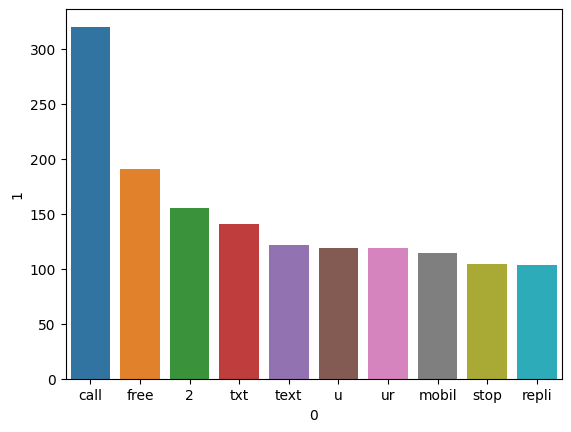

In [57]:
sns.barplot(x=top_10[0],y=top_10[1])
plt.show()

In [58]:
# note :- now 'ham' is equal to 0

ham_wc=wc.generate(sms_df[sms_df['target']==0]['sms'].str.cat(sep=" "))
ham_wc

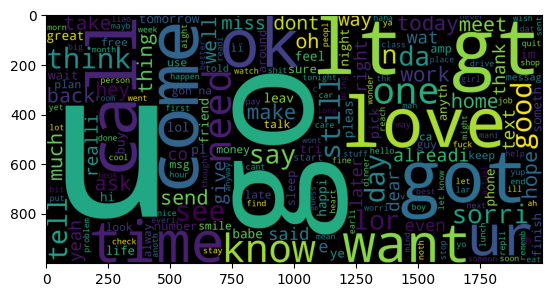

In [59]:
plt.imshow(ham_wc)
plt.show()

In [60]:
# for storing most used words
most_used_ham_words=[]

# .tolist() -> to convert 'series' object into 'list'
ham_list=sms_df[sms_df['target']==0]['sms'].tolist()

# accessing each individual elements from spam_list
for sentense in ham_list:

    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_ham_words.append(word)


In [61]:
top_10_ham=pd.DataFrame(Counter(most_used_ham_words).most_common(10))

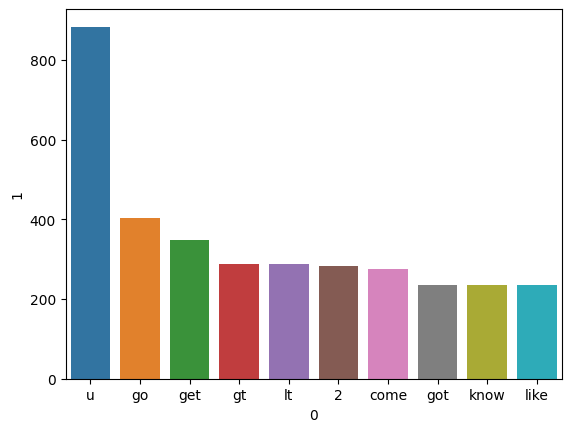

In [62]:
sns.barplot(x=top_10_ham[0],y=top_10_ham[1])
plt.show()

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfidf=TfidfVectorizer()

In [65]:
# converting into vectors
x=tfidf.fit_transform(sms_df['sms']).toarray()

In [66]:
x.shape

(5169, 6708)

In [67]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
y=sms_df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
y.shape

(5169,)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (4135, 6708)
x_test - >   (1034, 6708)
y_train - >   (4135,)
y_test - >   (1034,)


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model_lr=LogisticRegression()

In [76]:
# train the model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [77]:
# testing
y_pred_lr=model_lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0])

In [78]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [79]:
from sklearn.metrics import accuracy_score,precision_score

In [80]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_lr))
print("precision score :- ",precision_score(y_test,y_pred_lr))

accuracy score :-  0.9487427466150871
precision score :-  0.9423076923076923


In [81]:
from sklearn.svm import SVC

In [82]:
model_svm=SVC()

In [83]:
model_svm.fit(x_train,y_train)

SVC()

In [84]:
y_pred_svm=model_svm.predict(x_test)
y_pred_svm

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [86]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_svm))
print("precision score :- ",precision_score(y_test,y_pred_svm))

accuracy score :-  0.9680851063829787
precision score :-  0.9912280701754386


In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
# define depth of our decision tree in random forest
model_rf=RandomForestClassifier(max_depth=10, random_state=0)

In [89]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [90]:
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [91]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [92]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_rf))
print("precision score :- ",precision_score(y_test,y_pred_rf))

accuracy score :-  0.8936170212765957
precision score :-  1.0


In [93]:
from sklearn.naive_bayes import BernoulliNB

In [94]:
model_bnb=BernoulliNB()

In [95]:
model_bnb.fit(x_train,y_train)

BernoulliNB()

In [96]:
y_pred_bnb=model_bnb.predict(x_test)
y_pred_bnb

array([0, 1, 0, ..., 1, 0, 0])

In [97]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [98]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_bnb))
print("precision score :- ",precision_score(y_test,y_pred_bnb))

accuracy score :-  0.9661508704061895
precision score :-  0.9661016949152542


In [99]:
from sklearn.naive_bayes import GaussianNB

In [100]:
model_gnb=GaussianNB()

In [101]:
model_gnb.fit(x_train,y_train)

GaussianNB()

In [102]:
y_pred_gnb=model_gnb.predict(x_test)
y_pred_gnb

array([0, 0, 1, ..., 1, 0, 0])

In [103]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [104]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_gnb))
print("precision score :- ",precision_score(y_test,y_pred_gnb))

accuracy score :-  0.8636363636363636
precision score :-  0.5084033613445378


In [105]:
from sklearn.naive_bayes import MultinomialNB

In [106]:
model_mnb=MultinomialNB()

In [107]:
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [108]:
y_pred_mnb=model_mnb.predict(x_test)
y_pred_mnb

array([0, 0, 0, ..., 1, 0, 0])

In [109]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [110]:
print("accuracy score :- ",accuracy_score(y_test,y_pred_mnb))
print("precision score :- ",precision_score(y_test,y_pred_mnb))

accuracy score :-  0.9613152804642167
precision score :-  0.9906542056074766


In [111]:
import pickle

In [112]:
'''
dump() is use for save the model in the form of file in any formate

'wb' means write binary

'.sav'  = The SAV file extension is more commonly known as a generic
          extension that is used to save files and data, typically
          for saving progress in video games.
'''
pickle.dump(model_mnb,open('model.sav','wb'))

In [113]:
#### Saving the Tfidf Object for vectorizing 'input_sms' (converting text into numeric form)

pickle.dump(tfidf,open('tfidf_vectorizer.sav','wb'))

In [114]:
load_model_mnb=pickle.load(open('model.sav','rb'))
load_tfidf=pickle.load(open('tfidf_vectorizer.sav','rb'))

In [115]:
input_sms='Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s'

In [116]:
input_sms=transform_sms(input_sms)

In [117]:
input_sms

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [118]:
input_sms=load_tfidf.transform([input_sms])

In [119]:
pred=load_model_mnb.predict(input_sms)[0]

In [120]:
pred

1